In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [67]:
data = pd.read_csv("./creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [68]:
# count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
# count_classes.plot(kind = 'bar')
# plt.title("Fraud class histogram")
# plt.xlabel("Class")
# plt.ylabel("Frequency")

In [69]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [70]:
# data.loc[:, ['Time', 'Amount']].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

In [71]:
# plt.figure(figsize=(10,8))
# plt.title('Distribution of Time Feature')
# sns.distplot(data.Time)

In [72]:
# plt.figure(figsize=(10,8))
# plt.title('Distribution of Time Feature')
# sns.distplot(data.Amount)

In [73]:
df_fraud = data[data["Class"] == 1]
df_no_fraud = data[data["Class"] == 0]

# number of frauds
number_of_frauds = df_fraud.shape[0]
print("number of frauds:", number_of_frauds)

df_no_fraud_reducted = df_no_fraud.sample(number_of_frauds)
print("new dataset with no frauds:", df_no_fraud_reducted.shape[0])

# merge
df = pd.concat([df_no_fraud_reducted, df_fraud])
print("new shape", df.shape[0])

number of frauds: 492
new dataset with no frauds: 492
new shape 984


In [74]:
# new_counts = df.Class.value_counts()
# plt.figure(figsize=(8,6))
# sns.barplot(x=new_counts.index, y=new_counts)
# plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
# plt.ylabel('Frequency')
# plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [75]:
df_std = df.copy()

features = ["Time","Amount"]
to_std = df_std[features]
df_std[features] = (to_std - to_std.mean())/to_std.std()

df_std = df_std.sample(frac=1).reset_index(drop=True)
df_std.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.068095,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,-0.454045,1
1,-0.542879,1.340316,-0.455276,-0.131421,-0.698706,-0.748926,-1.195305,-0.129257,-0.251136,-1.345200,...,0.264935,0.574379,-0.167771,0.577113,0.707449,-0.116392,-0.041062,-0.002698,-0.276111,0
2,1.161813,-1.172183,1.661713,-3.049637,2.555058,3.669035,-3.162998,-5.985640,-2.179935,-1.120292,...,-0.812098,-0.295361,-5.988806,0.714381,-1.600024,-0.634783,0.822713,0.494375,-0.445149,1
3,0.077094,-1.855061,1.554964,-1.405809,0.669327,-0.280230,1.178652,-3.459979,-2.815155,1.242229,...,-0.095308,0.946629,-0.297403,-0.368344,0.198731,-0.078591,0.366709,0.073767,-0.281627,1
4,1.401688,1.146259,1.403458,-4.159148,2.660107,-0.323217,-1.836071,-1.623740,0.259562,-1.132044,...,0.564450,0.445744,-0.141136,-0.265517,0.362260,-0.416062,0.507370,0.243744,-0.225534,1


In [76]:
from sklearn.manifold import TSNE

# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# df_std = df_std[~((df_std < (Q1 - 2.5 * IQR)) |(df_std > (Q3 + 2.5 * IQR))).any(axis=1)]
# print(str(df_std.shape[0]))

X = df_std.drop('Class', axis=1)
y = df_std['Class']

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

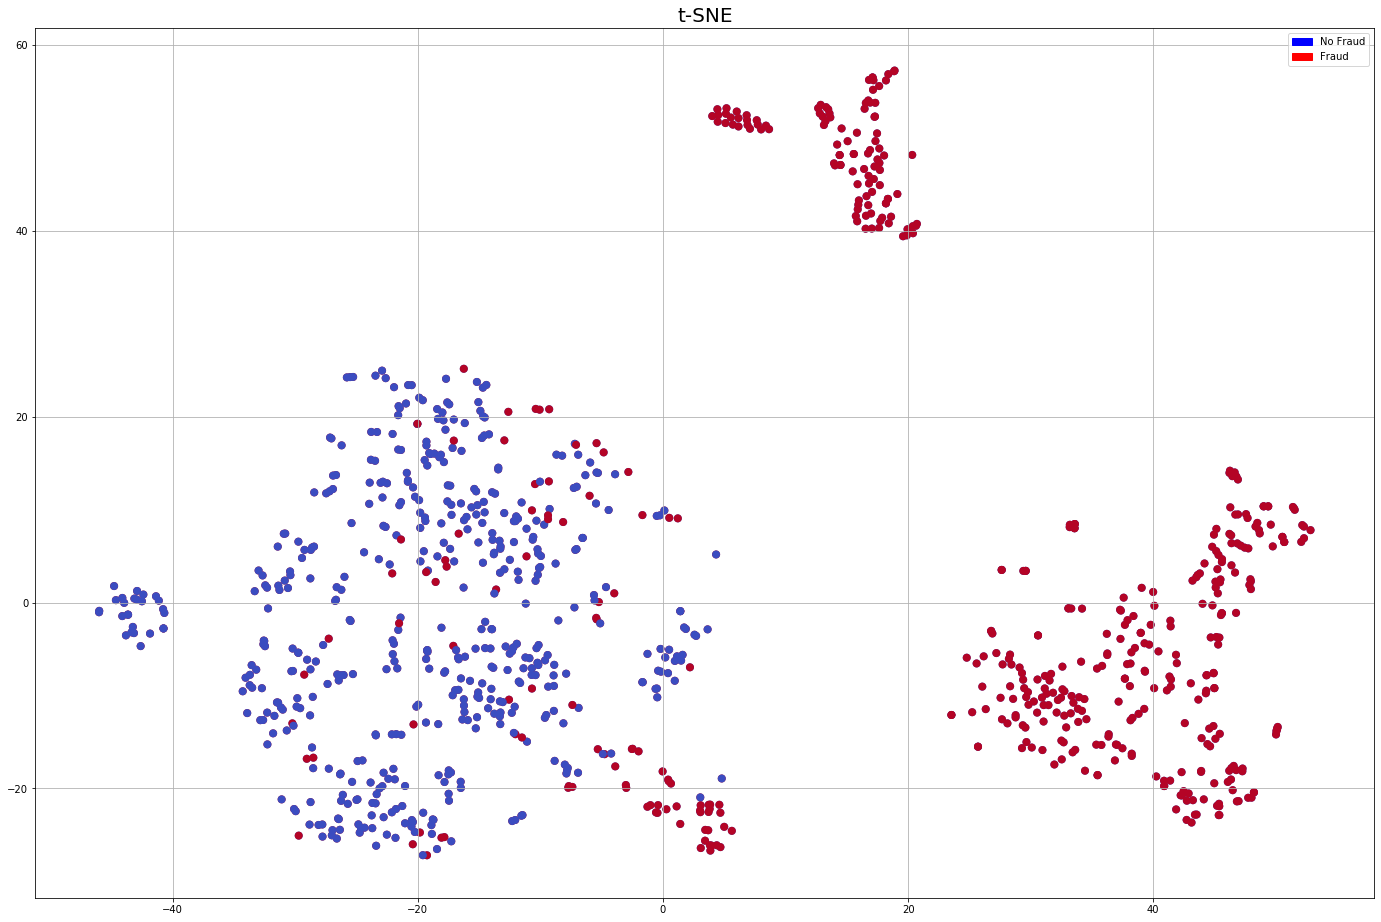

In [77]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='blue', label='No Fraud')
red_patch = mpatches.Patch(color='red', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=20)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [78]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [80]:
forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=42, 
                                max_features=0.6, min_samples_leaf=3, n_jobs=-1)

forest.fit(X_train, y_train)

y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)

y_pred_proba = forest.predict_proba(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: "+str(log_loss(y_test, y_pred_proba)))

ACCURACY: TRAIN=0.9886 TEST=0.9645
LOG LOSS: 0.14214608102207477
